In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv('Medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


# No missing value present

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['region'].value_counts()

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64

In [8]:
df['smoker'].value_counts()

no     2208
yes     564
Name: smoker, dtype: int64

In [9]:
df['age'].value_counts()

18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
28     60
21     60
22     60
26     60
25     58
50     58
27     58
20     58
53     58
48     58
49     56
44     56
41     56
24     56
32     56
30     56
56     56
39     54
33     54
42     54
40     54
43     54
31     54
57     54
29     54
37     52
59     52
58     52
34     52
55     52
35     50
36     50
38     50
62     48
60     46
64     46
63     46
61     46
Name: age, dtype: int64

## Binning : Coneverting numerical value into a discrete group

In [10]:
def discrete_age(num):
    if num < 30:
        return 'Young People'
    elif num > 30 and num < 40:
        return 'Middle Age'
    elif num > 40 and num < 50:
        return 'Upper Middle Age' 
    else:
        return 'Old People'

In [11]:
df['age'] = df['age'].apply(discrete_age)

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,Young People,female,27.900,0,yes,southwest,16884.92400
1,Young People,male,33.770,1,no,southeast,1725.55230
2,Young People,male,33.000,3,no,southeast,4449.46200
3,Middle Age,male,22.705,0,no,northwest,21984.47061
4,Middle Age,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,Upper Middle Age,female,45.320,1,no,southeast,8569.86180
2768,Young People,female,34.600,0,no,southwest,2020.17700
2769,Young People,male,26.030,1,yes,northwest,16450.89470
2770,Young People,male,18.715,0,no,northwest,21595.38229


In [13]:
cate = df[['age','sex','smoker','region']]
cate

,age,sex,smoker,region
0,Young People,female,yes,southwest
1,Young People,male,no,southeast
2,Young People,male,no,southeast
3,Middle Age,male,no,northwest
4,Middle Age,male,no,northwest
...,...,...,...,...
2767,Upper Middle Age,female,no,southeast
2768,Young People,female,no,southwest
2769,Young People,male,yes,northwest
2770,Young People,male,no,northwest


In [14]:
ohe = OneHotEncoder()
df1 = ohe.fit_transform(cate).toarray()

In [15]:
df1

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [16]:
df1.shape

(2772, 12)

# For data interpretation

In [17]:
df_sex = pd.get_dummies(df['sex']) #drop_first=True)

In [18]:
df_smoker = pd.get_dummies(df['smoker']) #drop_first=True)

In [19]:
df_sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2767,1,0
2768,1,0
2769,0,1
2770,0,1


In [20]:
df_age = pd.get_dummies(df['age']) #,drop_first=True)
df_region = pd.get_dummies(df['region']) #,drop_first=True)

In [21]:
df_region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2767,0,0,1,0
2768,0,0,0,1
2769,0,1,0,0
2770,0,1,0,0


In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,Young People,female,27.900,0,yes,southwest,16884.92400
1,Young People,male,33.770,1,no,southeast,1725.55230
2,Young People,male,33.000,3,no,southeast,4449.46200
3,Middle Age,male,22.705,0,no,northwest,21984.47061
4,Middle Age,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,Upper Middle Age,female,45.320,1,no,southeast,8569.86180
2768,Young People,female,34.600,0,no,southwest,2020.17700
2769,Young People,male,26.030,1,yes,northwest,16450.89470
2770,Young People,male,18.715,0,no,northwest,21595.38229


In [23]:
y = df['charges']
y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [24]:
df_origin = df[['bmi','children']]

In [25]:
X = pd.concat([df_age,df_sex,df_origin,df_smoker,df_region],axis=1)
X

,Middle Age,Old People,Upper Middle Age,Young People,female,male,bmi,children,no,yes,northeast,northwest,southeast,southwest
0,0,0,0,1,1,0,27.900,0,0,1,0,0,0,1
1,0,0,0,1,0,1,33.770,1,1,0,0,0,1,0
2,0,0,0,1,0,1,33.000,3,1,0,0,0,1,0
3,1,0,0,0,0,1,22.705,0,1,0,0,1,0,0
4,1,0,0,0,0,1,28.880,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,0,0,1,0,1,0,45.320,1,1,0,0,0,1,0
2768,0,0,0,1,1,0,34.600,0,1,0,0,0,0,1
2769,0,0,0,1,0,1,26.030,1,0,1,0,1,0,0
2770,0,0,0,1,0,1,18.715,0,1,0,0,1,0,0


In [28]:
col = X.columns

In [29]:
X = StandardScaler().fit_transform(X)
X

array([[-0.45300926, -0.69680022, -0.47938884, ..., -0.56124016,
        -0.61794372,  1.74717818],
       [-0.45300926, -0.69680022, -0.47938884, ..., -0.56124016,
         1.61827036, -0.57235147],
       [-0.45300926, -0.69680022, -0.47938884, ..., -0.56124016,
         1.61827036, -0.57235147],
       ...,
       [-0.45300926, -0.69680022, -0.47938884, ...,  1.78176845,
        -0.61794372, -0.57235147],
       [-0.45300926, -0.69680022, -0.47938884, ...,  1.78176845,
        -0.61794372, -0.57235147],
       [-0.45300926,  1.43513158, -0.47938884, ..., -0.56124016,
        -0.61794372,  1.74717818]])

In [30]:
X = pd.DataFrame(X,columns=col)
X

,Middle Age,Old People,Upper Middle Age,Young People,female,male,bmi,children,no,yes,northeast,northwest,southeast,southwest
0,-0.453009,-0.696800,-0.479389,1.471184,1.014536,-1.014536,-0.457114,-0.907084,-1.978609,1.978609,-0.557905,-0.561240,-0.617944,1.747178
1,-0.453009,-0.696800,-0.479389,1.471184,-0.985673,0.985673,0.500731,-0.083758,0.505406,-0.505406,-0.557905,-0.561240,1.618270,-0.572351
2,-0.453009,-0.696800,-0.479389,1.471184,-0.985673,0.985673,0.375085,1.562893,0.505406,-0.505406,-0.557905,-0.561240,1.618270,-0.572351
3,2.207460,-0.696800,-0.479389,-0.679724,-0.985673,0.985673,-1.304814,-0.907084,0.505406,-0.505406,-0.557905,1.781768,-0.617944,-0.572351
4,2.207460,-0.696800,-0.479389,-0.679724,-0.985673,0.985673,-0.297201,-0.907084,0.505406,-0.505406,-0.557905,1.781768,-0.617944,-0.572351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,-0.453009,-0.696800,2.085989,-0.679724,1.014536,-1.014536,2.385417,-0.083758,0.505406,-0.505406,-0.557905,-0.561240,1.618270,-0.572351
2768,-0.453009,-0.696800,-0.479389,1.471184,1.014536,-1.014536,0.636167,-0.907084,0.505406,-0.505406,-0.557905,-0.561240,-0.617944,1.747178
2769,-0.453009,-0.696800,-0.479389,1.471184,-0.985673,0.985673,-0.762253,-0.083758,-1.978609,1.978609,-0.557905,1.781768,-0.617944,-0.572351
2770,-0.453009,-0.696800,-0.479389,1.471184,-0.985673,0.985673,-1.955887,-0.907084,0.505406,-0.505406,-0.557905,1.781768,-0.617944,-0.572351


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Shallow Neural Naetwork
model1 = Sequential()
model1.add(Dense(14,activation='relu',input_dim=14))
model1.add(Dense(1,activation='linear'))
model1.compile(optimizer="adam",loss="mse")
history = model1.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
47/47 [==============================] - 13s 15ms/step - loss: 318089824.0000 - val_loss: 341322400.0000
Epoch 2/500
47/47 [==============================] - 0s 8ms/step - loss: 318070496.0000 - val_loss: 341301184.0000
Epoch 3/500
47/47 [==============================] - 0s 9ms/step - loss: 318048896.0000 - val_loss: 341275904.0000
Epoch 4/500
47/47 [==============================] - 0s 8ms/step - loss: 318022656.0000 - val_loss: 341245824.0000
Epoch 5/500
47/47 [==============================] - 0s 8ms/step - loss: 317991040.0000 - val_loss: 341209024.0000
Epoch 6/500
47/47 [==============================] - 0s 8ms/step - loss: 317952256.0000 - val_loss: 341164224.0000
Epoch 7/500
47/47 [==============================] - 0s 9ms/step - loss: 317905504.0000 - val_loss: 341111808.0000
Epoch 8/500
47/47 [==============================] - 1s 11ms/step - loss: 317850976.0000 - val_loss: 341049440.0000
Epoch 9/500
47/47 [==============================] - 0s 8ms/step - loss: 3177

47/47 [==============================] - 1s 11ms/step - loss: 300847200.0000 - val_loss: 323118656.0000
Epoch 72/500
47/47 [==============================] - 0s 10ms/step - loss: 300405600.0000 - val_loss: 322689824.0000
Epoch 73/500
47/47 [==============================] - 0s 9ms/step - loss: 299976160.0000 - val_loss: 322215488.0000
Epoch 74/500
47/47 [==============================] - 0s 7ms/step - loss: 299533600.0000 - val_loss: 321757088.0000
Epoch 75/500
47/47 [==============================] - 0s 8ms/step - loss: 299089632.0000 - val_loss: 321300992.0000
Epoch 76/500
47/47 [==============================] - 0s 8ms/step - loss: 298646336.0000 - val_loss: 320815296.0000
Epoch 77/500
47/47 [==============================] - 1s 12ms/step - loss: 298197888.0000 - val_loss: 320346304.0000
Epoch 78/500
47/47 [==============================] - 0s 10ms/step - loss: 297743680.0000 - val_loss: 319889024.0000
Epoch 79/500
47/47 [==============================] - 1s 13ms/step - loss: 297294

47/47 [==============================] - 0s 10ms/step - loss: 263081648.0000 - val_loss: 283503904.0000
Epoch 142/500
47/47 [==============================] - 0s 10ms/step - loss: 262441744.0000 - val_loss: 282853760.0000
Epoch 143/500
47/47 [==============================] - 1s 11ms/step - loss: 261814224.0000 - val_loss: 282184704.0000
Epoch 144/500
47/47 [==============================] - 1s 11ms/step - loss: 261180816.0000 - val_loss: 281524288.0000
Epoch 145/500
47/47 [==============================] - 0s 10ms/step - loss: 260546848.0000 - val_loss: 280872224.0000
Epoch 146/500
47/47 [==============================] - 0s 10ms/step - loss: 259907552.0000 - val_loss: 280225696.0000
Epoch 147/500
47/47 [==============================] - 0s 9ms/step - loss: 259271296.0000 - val_loss: 279530208.0000
Epoch 148/500
47/47 [==============================] - 0s 9ms/step - loss: 258617104.0000 - val_loss: 278840096.0000
Epoch 149/500
47/47 [==============================] - 0s 10ms/step - lo

Epoch 211/500
47/47 [==============================] - 0s 10ms/step - loss: 215451616.0000 - val_loss: 233629584.0000
Epoch 212/500
47/47 [==============================] - 0s 8ms/step - loss: 214724144.0000 - val_loss: 232888560.0000
Epoch 213/500
47/47 [==============================] - 0s 8ms/step - loss: 214011696.0000 - val_loss: 232104000.0000
Epoch 214/500
47/47 [==============================] - 0s 9ms/step - loss: 213285904.0000 - val_loss: 231360400.0000
Epoch 215/500
47/47 [==============================] - 0s 9ms/step - loss: 212574400.0000 - val_loss: 230606160.0000
Epoch 216/500
47/47 [==============================] - 0s 10ms/step - loss: 211854976.0000 - val_loss: 229859600.0000
Epoch 217/500
47/47 [==============================] - 0s 7ms/step - loss: 211136736.0000 - val_loss: 229119424.0000
Epoch 218/500
47/47 [==============================] - 0s 9ms/step - loss: 210420688.0000 - val_loss: 228359184.0000
Epoch 219/500
47/47 [==============================] - 0s 8ms/

Epoch 281/500
47/47 [==============================] - 1s 14ms/step - loss: 165129648.0000 - val_loss: 180962400.0000
Epoch 282/500
47/47 [==============================] - 1s 12ms/step - loss: 164431696.0000 - val_loss: 180244656.0000
Epoch 283/500
47/47 [==============================] - 1s 11ms/step - loss: 163739264.0000 - val_loss: 179504544.0000
Epoch 284/500
47/47 [==============================] - 0s 9ms/step - loss: 163047168.0000 - val_loss: 178770144.0000
Epoch 285/500
47/47 [==============================] - 0s 7ms/step - loss: 162343280.0000 - val_loss: 178061328.0000
Epoch 286/500
47/47 [==============================] - 0s 8ms/step - loss: 161651600.0000 - val_loss: 177331040.0000
Epoch 287/500
47/47 [==============================] - 0s 7ms/step - loss: 160957952.0000 - val_loss: 176583424.0000
Epoch 288/500
47/47 [==============================] - 0s 9ms/step - loss: 160258656.0000 - val_loss: 175878640.0000
Epoch 289/500
47/47 [==============================] - 0s 7ms

Epoch 351/500
47/47 [==============================] - 1s 13ms/step - loss: 119251424.0000 - val_loss: 132914872.0000
Epoch 352/500
47/47 [==============================] - 1s 13ms/step - loss: 118658856.0000 - val_loss: 132296976.0000
Epoch 353/500
47/47 [==============================] - 1s 12ms/step - loss: 118068248.0000 - val_loss: 131681872.0000
Epoch 354/500
47/47 [==============================] - 1s 13ms/step - loss: 117486520.0000 - val_loss: 131060888.0000
Epoch 355/500
47/47 [==============================] - 1s 14ms/step - loss: 116898248.0000 - val_loss: 130452472.0000
Epoch 356/500
47/47 [==============================] - 1s 13ms/step - loss: 116316568.0000 - val_loss: 129834016.0000
Epoch 357/500
47/47 [==============================] - 0s 10ms/step - loss: 115736312.0000 - val_loss: 129221512.0000
Epoch 358/500
47/47 [==============================] - 0s 9ms/step - loss: 115154816.0000 - val_loss: 128615720.0000
Epoch 359/500
47/47 [==============================] - 0s

47/47 [==============================] - 0s 9ms/step - loss: 83413248.0000 - val_loss: 95111600.0000
Epoch 422/500
47/47 [==============================] - 0s 8ms/step - loss: 82990976.0000 - val_loss: 94655104.0000
Epoch 423/500
47/47 [==============================] - 0s 9ms/step - loss: 82570160.0000 - val_loss: 94213888.0000
Epoch 424/500
47/47 [==============================] - 0s 10ms/step - loss: 82158144.0000 - val_loss: 93774312.0000
Epoch 425/500
47/47 [==============================] - 0s 8ms/step - loss: 81745416.0000 - val_loss: 93327064.0000
Epoch 426/500
47/47 [==============================] - 0s 8ms/step - loss: 81335728.0000 - val_loss: 92894536.0000
Epoch 427/500
47/47 [==============================] - 0s 8ms/step - loss: 80926072.0000 - val_loss: 92451088.0000
Epoch 428/500
47/47 [==============================] - 0s 8ms/step - loss: 80522360.0000 - val_loss: 92013584.0000
Epoch 429/500
47/47 [==============================] - 0s 9ms/step - loss: 80122552.0000 - va

47/47 [==============================] - 0s 7ms/step - loss: 60577440.0000 - val_loss: 70253792.0000
Epoch 493/500
47/47 [==============================] - 0s 8ms/step - loss: 60357696.0000 - val_loss: 70008464.0000
Epoch 494/500
47/47 [==============================] - 0s 8ms/step - loss: 60141936.0000 - val_loss: 69755544.0000
Epoch 495/500
47/47 [==============================] - 0s 8ms/step - loss: 59925392.0000 - val_loss: 69517736.0000
Epoch 496/500
47/47 [==============================] - 0s 9ms/step - loss: 59715840.0000 - val_loss: 69273464.0000
Epoch 497/500
47/47 [==============================] - 0s 10ms/step - loss: 59504332.0000 - val_loss: 69044216.0000
Epoch 498/500
47/47 [==============================] - 0s 8ms/step - loss: 59298948.0000 - val_loss: 68804480.0000
Epoch 499/500
47/47 [==============================] - 0s 9ms/step - loss: 59093452.0000 - val_loss: 68570736.0000
Epoch 500/500
47/47 [==============================] - 0s 8ms/step - loss: 58894148.0000 - va

In [34]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [35]:
model1.get_weights()

[array([[ 2.5315411e+00, -5.1062580e-02,  1.5434453e-01, -2.1533000e+00,
         -8.0099115e+00, -6.1673641e+00, -3.0954978e+00,  9.6790516e-01,
          2.2332458e+00, -5.1309858e-02, -7.0503196e-03, -9.0459391e-02,
         -1.0256357e+01, -5.0819440e+00],
        [ 7.4126348e+00,  1.3664749e+01, -1.0028508e-02,  1.3324247e+01,
          1.8985256e+01,  1.8730005e+01,  1.5869573e+01,  1.0183989e+01,
          1.0730155e+01,  8.1082573e-03, -9.2269853e-02, -2.1683744e-01,
          1.8310572e+01,  1.6809076e+01],
        [ 9.7246733e+00,  6.8344436e+00,  1.4290909e-01,  7.8208199e+00,
         -2.1930034e+00,  1.0011330e+01,  6.4840503e+00,  7.8542161e+00,
          2.6309917e+00, -1.3208346e-01, -6.6619642e-02, -1.0578740e-01,
          9.0454311e+00,  4.8594522e+00],
        [-1.6136602e+01, -1.7813255e+01,  1.9143717e-01, -1.7180870e+01,
         -1.8270077e+01, -2.0969860e+01, -1.7164856e+01, -1.5092947e+01,
         -1.4238001e+01, -3.7923895e-03, -1.3928977e-02, -1.0704849e-01

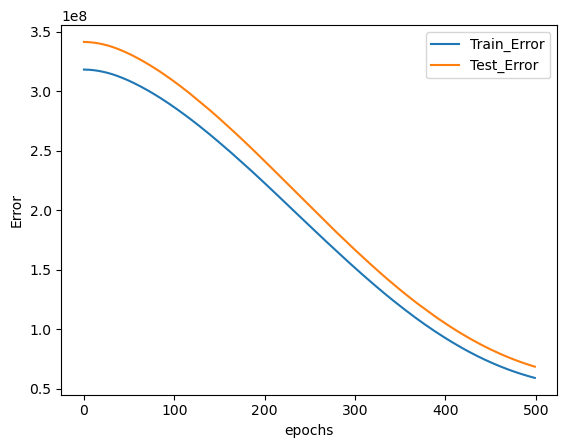

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(['Train_Error','Test_Error'])
plt.show()

In [44]:
y_pred = model1.predict(X_test)

29/29 [==============================] - 0s 3ms/step


In [45]:
r2_score(y_test,y_pred)

0.5736783060151414

# Deep Neural Network

In [46]:
model = Sequential()
model.add(Dense(14,activation='relu',input_dim=14))
model.add(Dense(512,activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer="adam",loss="mse")

In [47]:
history = model.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
47/47 [==============================] - 2s 20ms/step - loss: 317685376.0000 - val_loss: 335410688.0000
Epoch 2/500
47/47 [==============================] - 1s 14ms/step - loss: 175719808.0000 - val_loss: 79916896.0000
Epoch 3/500
47/47 [==============================] - 1s 13ms/step - loss: 49242144.0000 - val_loss: 45880544.0000
Epoch 4/500
47/47 [==============================] - 1s 15ms/step - loss: 36736628.0000 - val_loss: 40132916.0000
Epoch 5/500
47/47 [==============================] - 1s 21ms/step - loss: 34066980.0000 - val_loss: 36684916.0000
Epoch 6/500
47/47 [==============================] - 1s 21ms/step - loss: 31874860.0000 - val_loss: 38214836.0000
Epoch 7/500
47/47 [==============================] - 1s 14ms/step - loss: 30958478.0000 - val_loss: 35103640.0000
Epoch 8/500
47/47 [==============================] - 1s 12ms/step - loss: 29399202.0000 - val_loss: 31840656.0000
Epoch 9/500
47/47 [==============================] - 1s 15ms/step - loss: 27672166.00

47/47 [==============================] - 1s 13ms/step - loss: 19710194.0000 - val_loss: 26159008.0000
Epoch 73/500
47/47 [==============================] - 1s 12ms/step - loss: 19672866.0000 - val_loss: 26120068.0000
Epoch 74/500
47/47 [==============================] - 1s 11ms/step - loss: 19652572.0000 - val_loss: 24307082.0000
Epoch 75/500
47/47 [==============================] - 1s 11ms/step - loss: 19682480.0000 - val_loss: 25423902.0000
Epoch 76/500
47/47 [==============================] - 1s 12ms/step - loss: 19909544.0000 - val_loss: 25127096.0000
Epoch 77/500
47/47 [==============================] - 1s 13ms/step - loss: 20193730.0000 - val_loss: 25325848.0000
Epoch 78/500
47/47 [==============================] - 1s 13ms/step - loss: 19684908.0000 - val_loss: 24333144.0000
Epoch 79/500
47/47 [==============================] - 1s 13ms/step - loss: 19763152.0000 - val_loss: 24452102.0000
Epoch 80/500
47/47 [==============================] - 1s 11ms/step - loss: 19618796.0000 - va

Epoch 143/500
47/47 [==============================] - 1s 12ms/step - loss: 17993136.0000 - val_loss: 25250964.0000
Epoch 144/500
47/47 [==============================] - 1s 12ms/step - loss: 18844778.0000 - val_loss: 25317038.0000
Epoch 145/500
47/47 [==============================] - 1s 12ms/step - loss: 18125814.0000 - val_loss: 26606754.0000
Epoch 146/500
47/47 [==============================] - 1s 11ms/step - loss: 17878664.0000 - val_loss: 24294896.0000
Epoch 147/500
47/47 [==============================] - 1s 11ms/step - loss: 17361752.0000 - val_loss: 25046690.0000
Epoch 148/500
47/47 [==============================] - 1s 13ms/step - loss: 17911058.0000 - val_loss: 24196980.0000
Epoch 149/500
47/47 [==============================] - 1s 11ms/step - loss: 17327122.0000 - val_loss: 24739452.0000
Epoch 150/500
47/47 [==============================] - 0s 11ms/step - loss: 17972856.0000 - val_loss: 24830646.0000
Epoch 151/500
47/47 [==============================] - 1s 11ms/step - lo

47/47 [==============================] - 1s 14ms/step - loss: 14949116.0000 - val_loss: 24147250.0000
Epoch 214/500
47/47 [==============================] - 1s 13ms/step - loss: 13404936.0000 - val_loss: 24773144.0000
Epoch 215/500
47/47 [==============================] - 1s 12ms/step - loss: 13619390.0000 - val_loss: 25035402.0000
Epoch 216/500
47/47 [==============================] - 0s 11ms/step - loss: 13645529.0000 - val_loss: 25079092.0000
Epoch 217/500
47/47 [==============================] - 1s 13ms/step - loss: 13794866.0000 - val_loss: 25634730.0000
Epoch 218/500
47/47 [==============================] - 1s 12ms/step - loss: 13388839.0000 - val_loss: 24978746.0000
Epoch 219/500
47/47 [==============================] - 1s 13ms/step - loss: 13075203.0000 - val_loss: 27067054.0000
Epoch 220/500
47/47 [==============================] - 1s 12ms/step - loss: 13952370.0000 - val_loss: 24810504.0000
Epoch 221/500
47/47 [==============================] - 1s 12ms/step - loss: 13072876.0

Epoch 284/500
47/47 [==============================] - 1s 11ms/step - loss: 8745981.0000 - val_loss: 26521336.0000
Epoch 285/500
47/47 [==============================] - 6s 135ms/step - loss: 9161859.0000 - val_loss: 28051852.0000
Epoch 286/500
47/47 [==============================] - 1s 13ms/step - loss: 9260682.0000 - val_loss: 27058614.0000
Epoch 287/500
47/47 [==============================] - 5s 105ms/step - loss: 9257943.0000 - val_loss: 26716994.0000
Epoch 288/500
47/47 [==============================] - 1s 13ms/step - loss: 8730443.0000 - val_loss: 28558700.0000
Epoch 289/500
47/47 [==============================] - 5s 117ms/step - loss: 8512667.0000 - val_loss: 25892380.0000
Epoch 290/500
47/47 [==============================] - 6s 133ms/step - loss: 8523461.0000 - val_loss: 28523600.0000
Epoch 291/500
47/47 [==============================] - 1s 12ms/step - loss: 8989048.0000 - val_loss: 26104520.0000
Epoch 292/500
47/47 [==============================] - 7s 152ms/step - loss:

Epoch 355/500
47/47 [==============================] - 1s 11ms/step - loss: 7001068.0000 - val_loss: 25626304.0000
Epoch 356/500
47/47 [==============================] - 5s 107ms/step - loss: 6741301.0000 - val_loss: 25974140.0000
Epoch 357/500
47/47 [==============================] - 1s 14ms/step - loss: 6748686.0000 - val_loss: 26906308.0000
Epoch 358/500
47/47 [==============================] - 5s 114ms/step - loss: 7280726.0000 - val_loss: 26641290.0000
Epoch 359/500
47/47 [==============================] - 5s 119ms/step - loss: 7411652.0000 - val_loss: 28016090.0000
Epoch 360/500
47/47 [==============================] - 1s 13ms/step - loss: 7452367.0000 - val_loss: 26514232.0000
Epoch 361/500
47/47 [==============================] - 5s 109ms/step - loss: 6842865.0000 - val_loss: 26083972.0000
Epoch 362/500
47/47 [==============================] - 6s 130ms/step - loss: 6772340.0000 - val_loss: 27078186.0000
Epoch 363/500
47/47 [==============================] - 1s 12ms/step - loss:

Epoch 426/500
47/47 [==============================] - 6s 129ms/step - loss: 6280916.5000 - val_loss: 25085848.0000
Epoch 427/500
47/47 [==============================] - 1s 14ms/step - loss: 6475191.5000 - val_loss: 27014920.0000
Epoch 428/500
47/47 [==============================] - 5s 12ms/step - loss: 6474867.0000 - val_loss: 25185506.0000
Epoch 429/500
47/47 [==============================] - 6s 120ms/step - loss: 6961046.0000 - val_loss: 24654064.0000
Epoch 430/500
47/47 [==============================] - 1s 12ms/step - loss: 6462393.0000 - val_loss: 24586232.0000
Epoch 431/500
47/47 [==============================] - 6s 125ms/step - loss: 5979050.5000 - val_loss: 25793636.0000
Epoch 432/500
47/47 [==============================] - 1s 13ms/step - loss: 6354180.5000 - val_loss: 25090694.0000
Epoch 433/500
47/47 [==============================] - 6s 124ms/step - loss: 6515266.0000 - val_loss: 26106184.0000
Epoch 434/500
47/47 [==============================] - 1s 13ms/step - loss: 

Epoch 497/500
47/47 [==============================] - 1s 13ms/step - loss: 6664830.0000 - val_loss: 24469908.0000
Epoch 498/500
47/47 [==============================] - 7s 148ms/step - loss: 5470598.5000 - val_loss: 24882826.0000
Epoch 499/500
47/47 [==============================] - 1s 13ms/step - loss: 5853890.0000 - val_loss: 24138416.0000
Epoch 500/500
47/47 [==============================] - 1s 12ms/step - loss: 7083557.0000 - val_loss: 25553374.0000


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 512)               7680      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)               

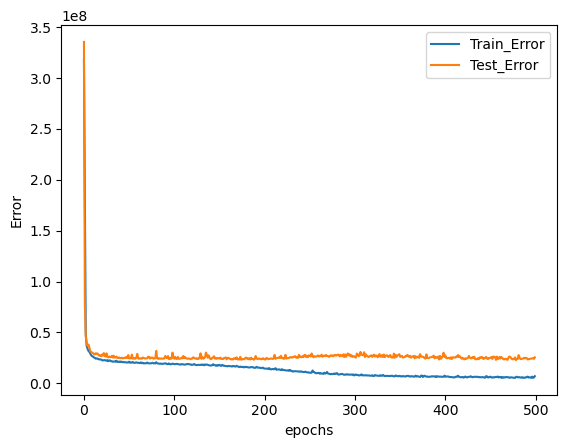

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(['Train_Error','Test_Error'])
plt.show()

In [50]:
y_pred = model.predict(X_test)

29/29 [==============================] - 1s 6ms/step


In [51]:
r2_score(y_test,y_pred)

0.8439267067092975

In [52]:
model = Sequential()
model.add(Dense(14,activation='relu',input_dim=14))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer="adam",loss="mse")
history = model.fit(X_train,y_train,batch_size=32,epochs=500,validation_split=0.2)

Epoch 1/500
47/47 [==============================] - 15s 160ms/step - loss: 282523712.0000 - val_loss: 135051952.0000
Epoch 2/500
47/47 [==============================] - 1s 12ms/step - loss: 71422856.0000 - val_loss: 55069740.0000
Epoch 3/500
47/47 [==============================] - 6s 134ms/step - loss: 42221960.0000 - val_loss: 50102244.0000
Epoch 4/500
47/47 [==============================] - 1s 12ms/step - loss: 35937316.0000 - val_loss: 38068180.0000
Epoch 5/500
47/47 [==============================] - 7s 150ms/step - loss: 33430172.0000 - val_loss: 38461040.0000
Epoch 6/500
47/47 [==============================] - 1s 11ms/step - loss: 31533866.0000 - val_loss: 33934252.0000
Epoch 7/500
47/47 [==============================] - 7s 153ms/step - loss: 29545566.0000 - val_loss: 32397648.0000
Epoch 8/500
47/47 [==============================] - 7s 150ms/step - loss: 28095030.0000 - val_loss: 31049486.0000
Epoch 9/500
47/47 [==============================] - 1s 14ms/step - loss: 272259

47/47 [==============================] - 1s 12ms/step - loss: 18835102.0000 - val_loss: 26546440.0000
Epoch 73/500
47/47 [==============================] - 5s 108ms/step - loss: 19375978.0000 - val_loss: 27590588.0000
Epoch 74/500
47/47 [==============================] - 1s 11ms/step - loss: 20050140.0000 - val_loss: 37544896.0000
Epoch 75/500
47/47 [==============================] - 5s 113ms/step - loss: 19548146.0000 - val_loss: 26709906.0000
Epoch 76/500
47/47 [==============================] - 5s 108ms/step - loss: 19295036.0000 - val_loss: 26913944.0000
Epoch 77/500
47/47 [==============================] - 0s 10ms/step - loss: 18568070.0000 - val_loss: 26761562.0000
Epoch 78/500
47/47 [==============================] - 5s 112ms/step - loss: 18668518.0000 - val_loss: 28785598.0000
Epoch 79/500
47/47 [==============================] - 1s 18ms/step - loss: 19248106.0000 - val_loss: 27275928.0000
Epoch 80/500
47/47 [==============================] - 6s 135ms/step - loss: 18354270.0000

Epoch 143/500
47/47 [==============================] - 4s 88ms/step - loss: 13833462.0000 - val_loss: 26656600.0000
Epoch 144/500
47/47 [==============================] - 4s 94ms/step - loss: 13843884.0000 - val_loss: 27564290.0000
Epoch 145/500
47/47 [==============================] - 1s 11ms/step - loss: 14798125.0000 - val_loss: 28079380.0000
Epoch 146/500
47/47 [==============================] - 5s 100ms/step - loss: 14477774.0000 - val_loss: 32073394.0000
Epoch 147/500
47/47 [==============================] - 1s 16ms/step - loss: 13587618.0000 - val_loss: 26248696.0000
Epoch 148/500
47/47 [==============================] - 4s 96ms/step - loss: 13441443.0000 - val_loss: 26611434.0000
Epoch 149/500
47/47 [==============================] - 5s 111ms/step - loss: 13348228.0000 - val_loss: 26988536.0000
Epoch 150/500
47/47 [==============================] - 1s 11ms/step - loss: 13219946.0000 - val_loss: 27252332.0000
Epoch 151/500
47/47 [==============================] - 4s 94ms/step - 

Epoch 214/500
47/47 [==============================] - 4s 85ms/step - loss: 8606284.0000 - val_loss: 26376216.0000
Epoch 215/500
47/47 [==============================] - 0s 8ms/step - loss: 8138101.5000 - val_loss: 23588200.0000
Epoch 216/500
47/47 [==============================] - 0s 8ms/step - loss: 8883262.0000 - val_loss: 26229202.0000
Epoch 217/500
47/47 [==============================] - 4s 87ms/step - loss: 8780351.0000 - val_loss: 26109150.0000
Epoch 218/500
47/47 [==============================] - 0s 9ms/step - loss: 8548082.0000 - val_loss: 24595800.0000
Epoch 219/500
47/47 [==============================] - 0s 8ms/step - loss: 8487189.0000 - val_loss: 25764410.0000
Epoch 220/500
47/47 [==============================] - 4s 7ms/step - loss: 7601247.0000 - val_loss: 25471040.0000
Epoch 221/500
47/47 [==============================] - 0s 8ms/step - loss: 7685862.5000 - val_loss: 25662192.0000
Epoch 222/500
47/47 [==============================] - 4s 76ms/step - loss: 7759239.00

47/47 [==============================] - 0s 6ms/step - loss: 6464616.0000 - val_loss: 23569508.0000
Epoch 286/500
47/47 [==============================] - 3s 65ms/step - loss: 6369418.5000 - val_loss: 22986984.0000
Epoch 287/500
47/47 [==============================] - 0s 7ms/step - loss: 6304278.5000 - val_loss: 24911578.0000
Epoch 288/500
47/47 [==============================] - 0s 7ms/step - loss: 6460612.0000 - val_loss: 23258498.0000
Epoch 289/500
47/47 [==============================] - 0s 6ms/step - loss: 7162438.5000 - val_loss: 24062062.0000
Epoch 290/500
47/47 [==============================] - 0s 5ms/step - loss: 6505610.0000 - val_loss: 25137904.0000
Epoch 291/500
47/47 [==============================] - 0s 6ms/step - loss: 6644358.0000 - val_loss: 23658994.0000
Epoch 292/500
47/47 [==============================] - 3s 62ms/step - loss: 6213816.0000 - val_loss: 23709616.0000
Epoch 293/500
47/47 [==============================] - 0s 8ms/step - loss: 6733509.0000 - val_loss: 

Epoch 357/500
47/47 [==============================] - 0s 5ms/step - loss: 6572675.5000 - val_loss: 23435718.0000
Epoch 358/500
47/47 [==============================] - 3s 66ms/step - loss: 6375931.5000 - val_loss: 22186218.0000
Epoch 359/500
47/47 [==============================] - 0s 10ms/step - loss: 6404894.5000 - val_loss: 21765500.0000
Epoch 360/500
47/47 [==============================] - 3s 67ms/step - loss: 6828756.5000 - val_loss: 23621710.0000
Epoch 361/500
47/47 [==============================] - 0s 5ms/step - loss: 5945764.5000 - val_loss: 23814018.0000
Epoch 362/500
47/47 [==============================] - 0s 6ms/step - loss: 6260301.5000 - val_loss: 22408076.0000
Epoch 363/500
47/47 [==============================] - 3s 71ms/step - loss: 6518838.0000 - val_loss: 22337438.0000
Epoch 364/500
47/47 [==============================] - 0s 6ms/step - loss: 6394436.0000 - val_loss: 24372194.0000
Epoch 365/500
47/47 [==============================] - 0s 6ms/step - loss: 6509805.0

47/47 [==============================] - 0s 5ms/step - loss: 5868650.0000 - val_loss: 22208752.0000
Epoch 429/500
47/47 [==============================] - 0s 6ms/step - loss: 5273226.5000 - val_loss: 24752604.0000
Epoch 430/500
47/47 [==============================] - 3s 69ms/step - loss: 5776103.5000 - val_loss: 26049524.0000
Epoch 431/500
47/47 [==============================] - 0s 9ms/step - loss: 5960249.5000 - val_loss: 23986346.0000
Epoch 432/500
47/47 [==============================] - 4s 83ms/step - loss: 5568047.0000 - val_loss: 21565902.0000
Epoch 433/500
47/47 [==============================] - 0s 6ms/step - loss: 5944935.0000 - val_loss: 21933998.0000
Epoch 434/500
47/47 [==============================] - 0s 8ms/step - loss: 5675580.5000 - val_loss: 24661966.0000
Epoch 435/500
47/47 [==============================] - 4s 96ms/step - loss: 5663981.5000 - val_loss: 25289394.0000
Epoch 436/500
47/47 [==============================] - 0s 7ms/step - loss: 5646106.5000 - val_loss:

Epoch 500/500
47/47 [==============================] - 0s 6ms/step - loss: 4903192.5000 - val_loss: 22651822.0000


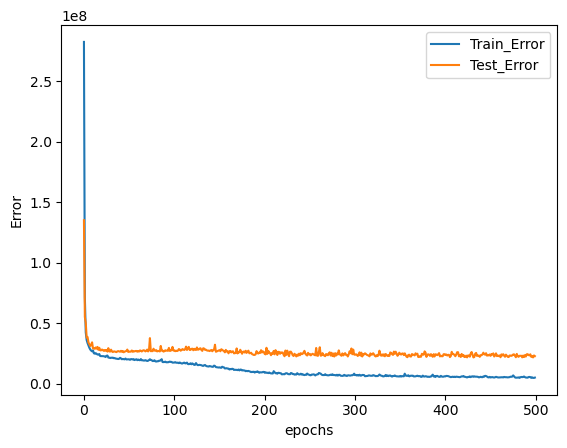

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(['Train_Error','Test_Error'])
plt.show()

In [54]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

29/29 [==============================] - 0s 3ms/step


0.8447579090419401